# Binary Logistic Regression
## Building the model with scikit-learn

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("heart_failure.csv")

# list of columns in dataset with categorical data
cat_list=[
    "anaemia", 
    "diabetes",
    "high_blood_pressure",
    "sex",
    "smoking",
]
labelencoder=LabelEncoder()
for cat in cat_list:
    df[cat+"_cat"]=labelencoder.fit_transform(df[cat])
    df=df.drop(axis=1, columns=cat )

In [31]:
df.columns

Index(['srno', 'age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT',
       'anaemia_cat', 'diabetes_cat', 'high_blood_pressure_cat', 'sex_cat',
       'smoking_cat'],
      dtype='object')

In [32]:
feature_names=list(df.columns[1:]) # feature columns
feature_names.remove("DEATH_EVENT") #excluding the death event column
# splitting the data
X=df[feature_names]
y=df["DEATH_EVENT"]

## Model Development and Prediction

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.10, random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

# Confusion Matrix
## evaluating the performance of the classification model

In [51]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#here, diagonal values->accurate predictions
 #       non-diagonal values->inaccurate predictions
#  adjust dataset ratio accordingly

array([[20,  0],
       [ 6,  4]])

## visualizing the confusion matrix with a heatmap instead

Text(33.0, 0.5, 'Actual')

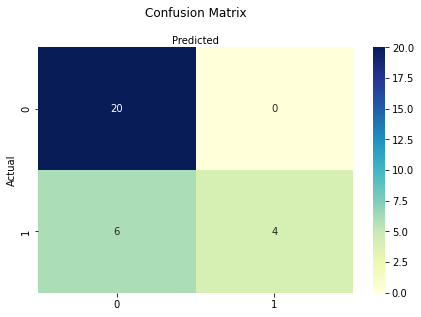

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax=plt.subplots()
tickmarks=np.arange(len(class_names))

plt.xticks(tickmarks, class_names)
plt.yticks(tickmarks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 1.0
Recall: 0.4
